In [2]:
import os
from time import time
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score
from collections import defaultdict
import pickle
from sklearn.decomposition import PCA
import random as rand
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


#### General Functions

In [9]:
# Unpickle Function for the CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
    
import matplotlib.pyplot as plt
def plotImage(image,label):
    image = image.reshape((3, 32, 32)).transpose([1, 2, 0])
    plt.imshow(image)
    plt.show()
    print('Predicted:',label)
    
    
def combineData(data,limit=None):
    combined_data = defaultdict(list)
    for d in data:
        for key, value_list in d.items():
            if limit is not None:
                value_list = value_list[:limit]
            combined_data[key].extend(value_list)
    return combined_data

## SVM

### Variables and Files

In [4]:
dir='cifar-10-batches-py/'
# Get the files
files=os.listdir(dir)
files=[dir+file for file in files]
files.sort()

# Get the test file
test_file=files[len(files)-1]

# index file and test File are not needed
files=files[:len(files)-2]

# Get the data
data=[unpickle(file) for file in files]
test_file=unpickle(test_file)

data_names=data[0]
data=data[1:]

### Kernel test

In [5]:
limit=1000
df=combineData(data,limit)

X_train=df[b'data']
y_train=df[b'labels']

X_test=test_file[b'data'][:limit]
y_test=test_file[b'labels'][:limit]


In [6]:
svcL1=SVC(kernel='linear',C=1)
svcL2=SVC(kernel='linear',C=10)
svcL3=SVC(kernel='linear',C=100)

svcR1=SVC(kernel='rbf',C=1)
svcR2=SVC(kernel='rbf',C=10)
svcR3=SVC(kernel='rbf',C=100)

svcP1=SVC(kernel='poly',C=1)
svcP2=SVC(kernel='poly',C=10)
svcP3=SVC(kernel='poly',C=100)

In [7]:
svcL1.fit(X_train,y_train)
print('Linear Kernel C=1')
print('Training Accuracy: ',svcL1.score(X_train,y_train))
print('Testing Accuracy: ',svcL1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcL1.predict(X_test),average='macro'))

Linear Kernel C=1
Training Accuracy:  1.0
Testing Accuracy:  0.318
F1 Score:  0.3161897134766362


False asnwer:
Actual Label: 0


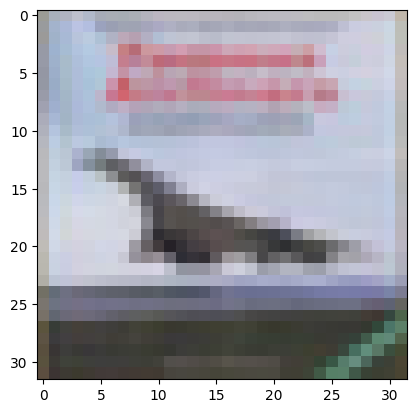

Predicted: 2
Correct asnwer:
Actual Label: 8


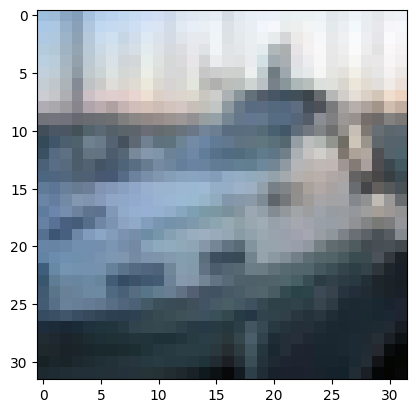

Predicted: 8


In [11]:
y_pred=svcL1.predict(X_test)

right_dess=None
false_dess=None
for i in range(len(y_test)):
    if y_test[i]==y_pred[i]:
        right_dess=i
    else:
        false_dess=i
    if(right_dess is not None and false_dess is not None):
        break
    
print("False asnwer:")
print('Actual Label:',y_test[false_dess])
plotImage(X_test[false_dess],y_pred[false_dess])

print("Correct asnwer:")
print('Actual Label:',y_test[right_dess])
plotImage(X_test[right_dess],y_pred[right_dess])

In [8]:
svcR1.fit(X_train,y_train)
print('RBF Kernel C=1')
print('Training Accuracy: ',svcR1.score(X_train,y_train))
print('Testing Accuracy: ',svcR1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcR1.predict(X_test),average='macro'))

RBF Kernel C=1
Training Accuracy:  0.7154
Testing Accuracy:  0.45
F1 Score:  0.43970017914845594


In [9]:
svcP1.fit(X_train,y_train)
print('Polynomial Kernel C=1')
print('Training Accuracy: ',svcP1.score(X_train,y_train))
print('Testing Accuracy: ',svcP1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcP1.predict(X_test),average='macro'))

Polynomial Kernel C=1
Training Accuracy:  0.9768
Testing Accuracy:  0.407
F1 Score:  0.4036937439021805


In [10]:
svcL2.fit(X_train,y_train)
print('Linear Kernel C=10')
print('Training Accuracy: ',svcL1.score(X_train,y_train))
print('Testing Accuracy: ',svcL1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcL1.predict(X_test),average='macro'))

svcR2.fit(X_train,y_train)
print('RBF Kernel C=10')
print('Training Accuracy: ',svcR1.score(X_train,y_train))
print('Testing Accuracy: ',svcR1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcR1.predict(X_test),average='macro'))

svcP2.fit(X_train,y_train)
print('Polynomial Kernel C=10')
print('Training Accuracy: ',svcP1.score(X_train,y_train))
print('Testing Accuracy: ',svcP1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcP1.predict(X_test),average='macro'))

Linear Kernel C=10
Training Accuracy:  1.0
Testing Accuracy:  0.318
F1 Score:  0.3161897134766362
RBF Kernel C=10
Training Accuracy:  0.7154
Testing Accuracy:  0.45
F1 Score:  0.43970017914845594
Polynomial Kernel C=10
Training Accuracy:  0.9768
Testing Accuracy:  0.407
F1 Score:  0.4036937439021805


In [11]:
svcL3.fit(X_train,y_train)
print('Linear Kernel C=100')
print('Training Accuracy: ',svcL1.score(X_train,y_train))
print('Testing Accuracy: ',svcL1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcL1.predict(X_test),average='macro'))

svcR3.fit(X_train,y_train)
print('RBF Kernel C=100')
print('Training Accuracy: ',svcR1.score(X_train,y_train))
print('Testing Accuracy: ',svcR1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcR1.predict(X_test),average='macro'))

svcP3.fit(X_train,y_train)
print('Polynomial Kernel C=100')
print('Training Accuracy: ',svcP1.score(X_train,y_train))
print('Testing Accuracy: ',svcP1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svcP1.predict(X_test),average='macro'))

Linear Kernel C=100
Training Accuracy:  1.0
Testing Accuracy:  0.318
F1 Score:  0.3161897134766362
RBF Kernel C=100
Training Accuracy:  0.7154
Testing Accuracy:  0.45
F1 Score:  0.43970017914845594
Polynomial Kernel C=100
Training Accuracy:  0.9768
Testing Accuracy:  0.407
F1 Score:  0.4036937439021805


In [13]:
svc1=SVC(kernel='rbf',C=1,gamma=0.1)
svc2=SVC(kernel='rbf',C=1,gamma=0.01)
svc3=SVC(kernel='rbf',C=1,gamma=0.001)

svc1.fit(X_train,y_train)
print('rbf Kernel C=1 gamma=0.1')
print('Training Accuracy: ',svc1.score(X_train,y_train))
print('Testing Accuracy: ',svc1.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svc1.predict(X_test),average='macro'))

svc2.fit(X_train,y_train)
print('rbf Kernel C=1 gamma=0.01')
print('Training Accuracy: ',svc2.score(X_train,y_train))
print('Testing Accuracy: ',svc2.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svc2.predict(X_test),average='macro'))

svc3.fit(X_train,y_train)
print('rbf Kernel C=1 gamma=0.001')
print('Training Accuracy: ',svc3.score(X_train,y_train))
print('Testing Accuracy: ',svc3.score(X_test,y_test))
print('F1 Score: ',f1_score(y_test,svc3.predict(X_test),average='macro'))


rbf Kernel C=1 gamma=0.1
Training Accuracy:  1.0
Testing Accuracy:  0.09
F1 Score:  0.016513761467889906
rbf Kernel C=1 gamma=0.01
Training Accuracy:  1.0
Testing Accuracy:  0.09
F1 Score:  0.016513761467889906
rbf Kernel C=1 gamma=0.001
Training Accuracy:  1.0
Testing Accuracy:  0.09
F1 Score:  0.016513761467889906


### Batches

In [8]:
svc=SVC(kernel='poly',C=10,gamma='auto')
limit_before=0

for limit in [1000,2000,5000,10000,20000,50000]:
    df=combineData(data)
   
    X_train=df[b'data'][limit_before:limit]
    y_train=df[b'labels'][limit_before:limit]

    X_test=test_file[b'data']
    y_test=test_file[b'labels']
    
    svc.fit(X_train,y_train)
    print('poly Kernel, C=10, gamma=auto, before_limit:',limit_before,'limit:',limit)
    print('Training Accuracy: ',svc.score(X_train,y_train))
    print('Testing Accuracy: ',svc.score(X_test,y_test))
    print('F1 Score: ',f1_score(y_test,svc.predict(X_test),average='macro'))
    
    
    limit_before=limit

poly Kernel, C=10, gamma=auto, before_limit: 0 limit: 1000
Training Accuracy:  1.0
Testing Accuracy:  0.3202
F1 Score:  0.3200698303519453
poly Kernel, C=10, gamma=auto, before_limit: 1000 limit: 2000
Training Accuracy:  1.0
Testing Accuracy:  0.3183
F1 Score:  0.31856781388040945
poly Kernel, C=10, gamma=auto, before_limit: 2000 limit: 5000
Training Accuracy:  1.0
Testing Accuracy:  0.3635
F1 Score:  0.3638082341072698
poly Kernel, C=10, gamma=auto, before_limit: 5000 limit: 10000
Training Accuracy:  1.0
Testing Accuracy:  0.3852
F1 Score:  0.38643190088314633


In [9]:
svc=SVC(kernel='linear',C=10,gamma='auto')
limit_before=0

for limit in [1000,2000,5000,10000,20000,50000]:
    df=combineData(data)
   
    X_train=df[b'data'][limit_before:limit]
    y_train=df[b'labels'][limit_before:limit]

    X_test=test_file[b'data']
    y_test=test_file[b'labels']
    
    svc.fit(X_train,y_train)
    print('poly Kernel, C=10, gamma=auto, before_limit:',limit_before,'limit:',limit)
    print('Training Accuracy: ',svc.score(X_train,y_train))
    print('Testing Accuracy: ',svc.score(X_test,y_test))
    print('F1 Score: ',f1_score(y_test,svc.predict(X_test),average='macro'))
    
    
    limit_before=limit

poly Kernel, C=10, gamma=auto, before_limit: 0 limit: 1000
Training Accuracy:  1.0
Testing Accuracy:  0.2972
F1 Score:  0.29677880216671293
poly Kernel, C=10, gamma=auto, before_limit: 1000 limit: 2000
Training Accuracy:  1.0
Testing Accuracy:  0.2981
F1 Score:  0.2985846296838123
poly Kernel, C=10, gamma=auto, before_limit: 2000 limit: 5000
Training Accuracy:  1.0
Testing Accuracy:  0.3016
F1 Score:  0.3011359136789427
poly Kernel, C=10, gamma=auto, before_limit: 5000 limit: 10000
Training Accuracy:  1.0
Testing Accuracy:  0.2999
F1 Score:  0.300929826330398
poly Kernel, C=10, gamma=auto, before_limit: 10000 limit: 20000
Training Accuracy:  1.0
Testing Accuracy:  0.301
F1 Score:  0.30151137358243824


### Get scores of 64 models

In [36]:
kernel=['linear','rbf','poly']
C=[1,10,100]
gamma=['auto',0.001,0.0001]
limit = 4000

df=combineData(data,limit)

X_train=df[b'data'][:limit]
y_train=df[b'labels'][:limit]

X_test=test_file[b'data']
y_test=test_file[b'labels']

models=[]
index=0
for k in kernel:
    for c in C:
        for g in gamma:
            time_start=time()
            index+=1
            
            print('Kernel:',k,'C:',c,'gamma:',g,'index:',index)
            
            svc=SVC(kernel=k,C=c,gamma=g)
            svc.fit(X_train,y_train)
            f1=f1_score(y_test,svc.predict(X_test),average='macro')
            train_acccuracy=svc.score(X_train,y_train)
            test_accuracy=svc.score(X_test,y_test)
            
            time_end=time()
            print('Time Taken:',(time_end-time_start)/60,'minutes')
            models.append([svc,k,c,g,train_acccuracy,test_accuracy,f1,time_end-time_start])
    

Kernel: linear C: 1 gamma: auto index: 1
Time Taken: 5.29200998544693 minutes
Kernel: linear C: 1 gamma: 0.001 index: 2
Time Taken: 5.289050002892812 minutes
Kernel: linear C: 1 gamma: 0.0001 index: 3
Time Taken: 5.252700010935466 minutes
Kernel: linear C: 10 gamma: auto index: 4
Time Taken: 5.631417441368103 minutes
Kernel: linear C: 10 gamma: 0.001 index: 5
Time Taken: 5.84684092203776 minutes
Kernel: linear C: 10 gamma: 0.0001 index: 6
Time Taken: 6.9043173551559445 minutes
Kernel: linear C: 100 gamma: auto index: 7
Time Taken: 6.870316628615061 minutes
Kernel: linear C: 100 gamma: 0.001 index: 8
Time Taken: 6.828066674868266 minutes
Kernel: linear C: 100 gamma: 0.0001 index: 9
Time Taken: 8.28017292022705 minutes
Kernel: rbf C: 1 gamma: auto index: 10
Time Taken: 9.059309693177541 minutes
Kernel: rbf C: 1 gamma: 0.001 index: 11
Time Taken: 10.046081598599752 minutes
Kernel: rbf C: 1 gamma: 0.0001 index: 12
Time Taken: 9.934654593467712 minutes
Kernel: rbf C: 10 gamma: auto index: 1

In [ ]:
import pickle
with open ('SVMs/cifar-10-batches-py/models.pkl','wb') as f:
    pickle.dump(models,f)
    

In [20]:
time_start=time()
c=10
gamma='auto'
kernel='poly'

svc=SVC(kernel=kernel,C=c,gamma=gamma)
print(svc)
svc.fit(X_train,y_train)
f1=f1_score(y_test,svc.predict(X_test),average='macro')
train_acccuracy=svc.score(X_train,y_train)
test_accuracy=svc.score(X_test,y_test)

time_end=time()
print('Time Taken:',(time_end-time_start)/60,'minutes')
print('F1 Score:',f1)
print('Training Accuracy:',train_acccuracy)
print('Testing Accuracy:',test_accuracy)
models.append([svc,kernel,c,gamma,train_acccuracy,test_accuracy,f1,time_end-time_start,len(X_train)])

SVC(C=10, gamma='auto', kernel='poly')
Time Taken: 8.956550161043802 minutes
F1 Score: 0.40910913300196283
Training Accuracy: 1.0
Testing Accuracy: 0.407


In [ ]:
models.sort(key=lambda x: x[6],reverse=True)
from tabulate import tabulate

print(tabulate([x[1:] for x in models], headers=['Kernel', 'C','gamma','Train Accuracy','Test Accuracy','F1 Score','Time Taken',"Data"]))


| Kernel |    C  |   gamma    | TrainAccuracy | TestAccuracy | F1Score  | TimeTaken | Data |
|--------|-------|------------|---------------|--------------|----------|-----------|------|
| poly   | 10.0  | auto       | 1.0           | 0.407        | 0.409109 | 537.393   | 8000 |
| poly   | 1.0   | 0.0001     | 1.0           | 0.3757       | 0.377222 | 315.936   | 4000 |
| poly   | 10.0  | auto       | 1.0           | 0.3757       | 0.377222 | 337.26    | 4000 |
| poly   | 10.0  | 0.0001     | 1.0           | 0.3757       | 0.377222 | 299.568   | 4000 |
| poly   | 100.0 | auto       | 1.0           | 0.3757       | 0.377222 | 300.7     | 4000 |
| poly   | 100.0 | 0.0001     | 1.0           | 0.3757       | 0.377222 | 288.391   | 4000 |
| poly   | 1.0   | auto       | 1.0           | 0.3757       | 0.377222 | 389.023   | 4000 |
| poly   | 1.0   | 0.001      | 1.0           | 0.3757       | 0.37722  | 314.357   | 4000 |
| poly   | 10.0  | 0.001      | 1.0           | 0.3757       | 0.37722  | 324.701   | 4000 |
| poly   | 100.0 | 0.001      | 1.0           | 0.3757       | 0.37722  | 305.631   | 4000 |
| rbf    | 100.0 | 1.00E-10   | 0.681         | 0.3303       | 0.326977 | 978.653   | 2000 |
| poly   | 10.0  | 1.00E-05   | 1.0           | 0.3203       | 0.32018  | 789.315   | 2000 |
| poly   | 1000.0| 1.00E-05   | 1.0           | 0.3203       | 0.32018  | 641.157   | 2000 |
| poly   | 10.0  | 0.0001     | 1.0           | 0.3203       | 0.32018  | 561.281   | 2000 |
| poly   | 1.0   | 0.0001     | 1.0           | 0.3203       | 0.32018  | 55.295    | 2000 |
| poly   | 100.0 | 0.0001     | 1.0           | 0.3203       | 0.32018  | 561.768   | 2000 |
| poly   | 100.0 | auto       | 1.0           | 0.3202       | 0.32007  | 564.036   | 2000 |
| poly   | 10.0  | auto       | 1.0           | 0.3202       | 0.32007  | 558.091   | 2000 |
| poly   | 1.0   | auto       | 1.0           | 0.3202       | 0.32007  | 548.759   | 2000 |
| poly   | 100.0 | 0.001      | 1.0           | 0.3202       | 0.32007  | 562.468   | 2000 |
| poly   | 10.0  | 0.001      | 1.0           | 0.3202       | 0.32007  | 555.483   | 2000 |
| poly   | 1.0   | 0.001      | 1.0           | 0.3202       | 0.32007  | 558.049   | 2000 |
| linear | 10.0  | 0.0001     | 1.0           | 0.3073       | 0.308494 | 414.259   | 4000 |
| linear | 100.0 | 0.001      | 1.0           | 0.3073       | 0.308494 | 409.684   | 4000 |
| linear | 1.0   | auto       | 1.0           | 0.3073       | 0.308494 | 317.521   | 4000 |
| linear | 1.0   | 0.001      | 1.0           | 0.3073       | 0.308494 | 317.343   | 4000 |
| linear | 1.0   | 0.0001     | 1.0           | 0.3073       | 0.308494 | 315.162   | 4000 |
| linear | 10.0  | auto       | 1.0           | 0.3073       | 0.308494 | 337.885   | 4000 |
| linear | 10.0  | 0.001      | 1.0           | 0.3073       | 0.308494 | 350.81    | 4000 |
| linear | 100.0 | auto       | 1.0           | 0.3073       | 0.308494 | 412.219   | 4000 |
| linear | 100.0 | 0.0001     | 1.0           | 0.3073       | 0.308494 | 496.81    | 4000 |
| linear | 10.0  | auto       | 1.0           | 0.3031       | 0.304481 | 593.181   | 8000 |
| linear | 1.0   | auto       | 1.0           | 0.2972       | 0.296779 | 42.689    | 2000 |
| linear | 100.0 | 0.001      | 1.0           | 0.2972       | 0.296779 | 41.524    | 2000 |
| linear | 0.01  | 0.001      | 1.0           | 0.2972       | 0.296779 | 765.549   | 2000 |
| linear | 10.0  | 0.0001     | 1.0           | 0.2972       | 0.296779 | 41.693    | 2000 |
| linear | 10.0  | 0.001      | 1.0           | 0.2972       | 0.296779 | 39.961    | 2000 |
| linear | 10.0  | auto       | 1.0           | 0.2972       | 0.296779 | 40.707    | 2000 |
| linear | 1.0   | 0.0001     | 1.0           | 0.2972       | 0.296779 | 40.832    | 2000 |
| linear | 1.0   | 0.001      | 1.0           | 0.2972       | 0.296779 | 40.714    | 2000 |
| linear | 100.0 | auto       | 1.0           | 0.2972       | 0.296779 | 43.49     | 2000 |
| linear | 10.0  | 1.00E-09   | 1.0           | 0.2972       | 0.296779 | 748.156   | 2000 |
| linear | 1000.0| auto       | 1.0           | 0.2972       | 0.296779 | 61.386    | 2000 |
| linear | 100.0 | 0.0001     | 1.0           | 0.2972       | 0.296779 | 41.341    | 2000 |
| poly   | 100.0 | 0.0001     | 0.189         | 0.168        | 0.0853473| 887.813   | 2000 |
| rbf    | 100.0  | 1.00E-12   | 0.189          | 0.1679        | 0.0852953  | 945.848    | 2000   |
| rbf    | 10.0   | 0.0001     | 1.0            | 0.1           | 0.0181818  | 64.945     | 2000   |
| rbf    | 100.0  | auto       | 1.0            | 0.1           | 0.0181818  | 64.652     | 2000   |
| rbf    | 100.0  | 0.001      | 1.0            | 0.1           | 0.0181818  | 63.37      | 2000   |
| rbf    | 100.0  | 0.0001     | 1.0            | 0.1           | 0.0181818  | 750.525    | 2000   |
| rbf    | 100.0  | 0.0001     | 1.0            | 0.1           | 0.0181818  | 542.288    | 4000   |
| rbf    | 100.0  | 0.001      | 1.0            | 0.1           | 0.0181818  | 518.609    | 4000   |
| rbf    | 1.0    | auto       | 1.0            | 0.1           | 0.0181818  | 543.559    | 4000   |
| rbf    | 1.0    | 0.001      | 1.0            | 0.1           | 0.0181818  | 602.765    | 4000   |
| rbf    | 1.0    | 0.0001     | 1.0            | 0.1           | 0.0181818  | 596.079    | 4000   |
| rbf    | 10.0   | auto       | 1.0            | 0.1           | 0.0181818  | 508.545    | 4000   |
| rbf    | 10.0   | 0.001      | 1.0            | 0.1           | 0.0181818  | 501.536    | 4000   |
| rbf    | 10.0   | 0.0001     | 1.0            | 0.1           | 0.0181818  | 498.968    | 4000   |
| rbf    | 100.0  | auto       | 1.0            | 0.1           | 0.0181818  | 473.041    | 4000   |
| poly   | 1000.0 | 1.00E-12   | 0.112          | 0.1           | 0.0181818  | 662.323    | 2000   |
| rbf    | 1.0    | auto       | 1.0            | 0.1           | 0.018181   | 63.34      | 2000   |
| rbf    | 1.0    | 0.001      | 1.0            | 0.1           | 0.018181   | 63.345     | 2000   |
| rbf    | 1.0    | 0.0001     | 1.0            | 0.1           | 0.018181   | 64.689     | 2000   |
| rbf    | 10.0   | auto       | 1.0            | 0.1           | 0.018181   | 64.58      | 2000   |
| rbf    | 10.0   | 0.001      | 1.0            | 0.1           | 0.018181   | 64.098     | 2000   |


In [ ]:
# Kmeans 
from sklearn.cluster import KMeans

num_clusters=[5,7,9,11,13]
kmean_models=[]
for n in num_clusters:
    limit = [4000,15000,30000,50000]
    
    for l in limit:
        df=combineData(data,l)

        X_train=df[b'data'][:l]
        y_train=df[b'labels'][:l]

        X_test=test_file[b'data']
        y_test=test_file[b'labels']
        kmeans=KMeans(n_clusters=n,random_state=0)
        kmeans.fit(X_train)
        kmean_models.append([n,l,accuracy_score(y_train,kmeans.predict(X_train)),accuracy_score(y_test,kmeans.predict(X_test)),f1_score(y_test,kmeans.predict(X_test),average='macro')])



In [18]:
# Nearest Class Centroid
from sklearn.neighbors import NearestCentroid
# Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

limit = [4000,15000,30000,50000]
nnc_models=[]
knn_models=[]

for l in limit:
    df=combineData(data,l)

    X_train=df[b'data'][:l]
    y_train=df[b'labels'][:l]

    X_test=test_file[b'data']
    y_test=test_file[b'labels']
    
    print("Size of Training Data:",len(X_train))
    start=time()
    
    nnc=NearestCentroid()
    nnc.fit(X_train,y_train)
    nnc_models.append([l,accuracy_score(y_train,nnc.predict(X_train)),accuracy_score(y_test,nnc.predict(X_test)),f1_score(y_test,nnc.predict(X_test),average='macro'),time()-start])
    
    knn = KNeighborsClassifier(n_neighbors=5)

    start=time()
    # Fit the model to the data
    knn.fit(X_train, y_train)
    knn_models.append([l,accuracy_score(y_train,knn.predict(X_train)),accuracy_score(y_test,knn.predict(X_test)),f1_score(y_test,knn.predict(X_test),average='macro'),time()-start])

Size of Training Data: 4000
Size of Training Data: 15000
Size of Training Data: 30000
Size of Training Data: 50000


In [54]:
knn_models.sort(key=lambda x: x[4],reverse=True)
nnc_models.sort(key=lambda x: x[4],reverse=True)
models.sort(key=lambda x: x[6],reverse=True)
from tabulate import tabulate
print(tabulate(knn_models, headers=['Data','Train Accuracy','Test Accuracy','F1 Score','Time Taken']),end='\n\n')
print(tabulate(nnc_models, headers=['Data','Train Accuracy','Test Accuracy','F1 Score','Time Taken']),end='\n\n')
print(tabulate([x[1:]for x in models], headers=['Kernel', 'C','gamma','Train Accuracy','Test Accuracy','F1 Score','Time Taken',"Data", "Dataset"]))


for i in range(len(knn_models)):
    print(models[i][6]-knn_models[i][3])
print()

for i in range(len(nnc_models)):
    print(models[i][6]-nnc_models[i][3])

  Data    Train Accuracy    Test Accuracy    F1 Score    Time Taken
------  ----------------  ---------------  ----------  ------------
 50000          0.50534            0.3398    0.326017       279.211
 30000          0.491233           0.3268    0.313433       100.29
 15000          0.478267           0.2995    0.282902        35.525
  4000          0.43875            0.2704    0.246162         8.147

  Data    Train Accuracy    Test Accuracy    F1 Score    Time Taken
------  ----------------  ---------------  ----------  ------------
 50000          0.26968            0.2774    0.254086      1.643
 30000          0.2712             0.2779    0.254589      1.166
 15000          0.270267           0.2786    0.255142      0.825988
  4000          0.28525            0.2761    0.255551      0.605985

Kernel      C  gamma      Train Accuracy    Test Accuracy    F1 Score    Time Taken    Data  Dataset
--------  ---  -------  ----------------  ---------------  ----------  ------------  ---

In [5]:
def process(k,c,g,index):
    time_start=time()
    index+=1
    
    print('Kernel:',k,'C:',c,'gamma:',g,'index:',index)
    
    svc=SVC(kernel=k,C=c,gamma=g)
    svc.fit(X_train,y_train)
    f1=f1_score(y_test,svc.predict(X_test),average='macro')
    train_acccuracy=svc.score(X_train,y_train)
    test_accuracy=svc.score(X_test,y_test)
    
    time_end=time()
    print('Time Taken:',(time_end-time_start)/60,'minutes')
    models_pca.append([k,c,g,train_acccuracy,test_accuracy,f1,time_end-time_start,limit,'CIFAR-10'])
    return index

kernel=['rbf','poly','linear']
C=[1,10,100]
gamma=['auto',0.001,0.0001]
limit = 4000

df=combineData(data,limit)

X_train=df[b'data'][:limit]
y_train=df[b'labels'][:limit]

X_test=test_file[b'data']
y_test=test_file[b'labels']

pca=PCA(0.9)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

models_pca=[]
index=0
for k in kernel:
    for c in C:
        if(k=='linear'):
            index=process(k,c,'auto',index)
        else:
            for g in gamma:
                index=process(k,c,g,index)
            
    

Kernel: rbf C: 1 gamma: auto index: 1
Time Taken: 0.7986687103907267 minutes
Kernel: rbf C: 1 gamma: 0.001 index: 2
Time Taken: 0.6998319745063781 minutes
Kernel: rbf C: 1 gamma: 0.0001 index: 3
Time Taken: 0.6302905281384786 minutes
Kernel: rbf C: 10 gamma: auto index: 4
Time Taken: 0.49238987763722736 minutes
Kernel: rbf C: 10 gamma: 0.001 index: 5
Time Taken: 0.5274699846903483 minutes
Kernel: rbf C: 10 gamma: 0.0001 index: 6
Time Taken: 0.5148957331975301 minutes
Kernel: rbf C: 100 gamma: auto index: 7
Time Taken: 0.5134164969126384 minutes
Kernel: rbf C: 100 gamma: 0.001 index: 8
Time Taken: 0.5483809192975362 minutes
Kernel: rbf C: 100 gamma: 0.0001 index: 9
Time Taken: 0.4371216893196106 minutes
Kernel: poly C: 1 gamma: auto index: 10
Time Taken: 0.11412241061528523 minutes
Kernel: poly C: 1 gamma: 0.001 index: 11
Time Taken: 0.12450120051701864 minutes
Kernel: poly C: 1 gamma: 0.0001 index: 12
Time Taken: 0.1211661696434021 minutes
Kernel: poly C: 10 gamma: auto index: 13
Time 

: 

In [ ]:
from tabulate import tabulate
models_pca.sort(key=lambda x : x[5],reverse=True)
print(tabulate([x for x in models_pca], headers=['Kernel', 'C','gamma','Train Accuracy','Test Accuracy','F1 Score','Time Taken',"Data", "Dataset"]))

Kernel      C  gamma      Train Accuracy    Test Accuracy    F1 Score    Time Taken    Data  Dataset
--------  ---  -------  ----------------  ---------------  ----------  ------------  ------  ---------
poly        1  0.0001                  1           0.3459   0.346725        9.06601    4000  CIFAR-10
poly       10  0.0001                  1           0.3459   0.346725        8.957      4000  CIFAR-10
poly      100  0.0001                  1           0.3459   0.346725        8.91501    4000  CIFAR-10
poly        1  auto                    1           0.3458   0.34664         8.98699    4000  CIFAR-10
poly        1  0.001                   1           0.3458   0.34664         8.95697    4000  CIFAR-10
poly       10  auto                    1           0.3458   0.34664         8.99899    4000  CIFAR-10
poly       10  0.001                   1           0.3458   0.34664         9.006      4000  CIFAR-10
poly      100  auto                    1           0.3458   0.34664         8.9430


| Kernel |    C  |   gamma    | TrainAccuracy | TestAccuracy | F1Score  | TimeTaken | Data |
|--------|-------|------------|---------------|--------------|----------|-----------|------|
| poly   | 10.0  | auto       | 1.0           | 0.407        | 0.409109 | 537.393   | 8000 |
| poly   | 1.0   | 0.0001     | 1.0           | 0.3757       | 0.377222 | 315.936   | 4000 |
| rbf    | 100.0 | 1.00E-10   | 0.681         | 0.3303       | 0.326977 | 978.653   | 2000 |
| linear | 10.0  | 0.0001     | 1.0           | 0.3073       | 0.308494 | 414.259   | 4000 |